In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Load the data
file_path = "Resources/alzheimers_disease_data.csv"
alzheimers_df = pd.read_csv(file_path)

# Display basic information about the DataFrame
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [2]:
# Display the first few rows of the DataFrame
alzheimers_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
X = alzheimers_df.copy()
X.drop(columns=['Diagnosis', 'DoctorInCharge', 'PatientID'], axis=1, inplace=True)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


In [4]:
y = alzheimers_df['Diagnosis'].values.reshape(-1, 1)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [6]:
scaler = StandardScaler()

In [7]:
X_scaler = scaler.fit(X_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Decision Tree

In [9]:
model = tree.DecisionTreeClassifier(random_state=5)

In [10]:
model = model.fit(X_train_scaled, y_train)

In [11]:
predictions = model.predict(X_test_scaled)

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,313,31
Actual 1,23,171


Accuracy Score : 0.8996282527881041
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       344
           1       0.85      0.88      0.86       194

    accuracy                           0.90       538
   macro avg       0.89      0.90      0.89       538
weighted avg       0.90      0.90      0.90       538



# Gradient Boost Model

In [14]:
gbc = GradientBoostingClassifier(random_state=5, n_estimators=500)

gbc.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=500, random_state=5)

In [15]:
gbc_predictions = gbc.predict(X_test_scaled)

In [16]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_gbc = confusion_matrix(y_test, gbc_predictions)
cm_df_gbc = pd.DataFrame(
    cm_gbc, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_gbc = accuracy_score(y_test, gbc_predictions)

In [17]:
#display the results of the model evaluation
display(cm_df_gbc)
print(f"Accuracy Score: {acc_score_gbc}")
print(classification_report(y_test, gbc_predictions))

,Predicted 0,Predicted 1
Actual 0,328,16
Actual 1,19,175


Accuracy Score: 0.9349442379182156
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       344
           1       0.92      0.90      0.91       194

    accuracy                           0.93       538
   macro avg       0.93      0.93      0.93       538
weighted avg       0.93      0.93      0.93       538



# Random Forest

In [18]:
# Import Random Forest Dependencies
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(random_state = 5, n_estimators=700)

In [20]:
rf_model.fit(X_train_scaled, y_train) 

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=700, random_state=5)

In [21]:
predictions = rf_model.predict(X_test_scaled)

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,332,12
Actual 1,20,174


Accuracy Score : 0.9405204460966543
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       344
           1       0.94      0.90      0.92       194

    accuracy                           0.94       538
   macro avg       0.94      0.93      0.93       538
weighted avg       0.94      0.94      0.94       538



In [24]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17576929251284087, 'FunctionalAssessment'),
 (0.16244286619010032, 'ADL'),
 (0.1246773647540608, 'MMSE'),
 (0.08195099333948774, 'MemoryComplaints'),
 (0.050402949533316234, 'BehavioralProblems'),
 (0.03134458713552946, 'CholesterolTriglycerides'),
 (0.030792928028143627, 'DietQuality'),
 (0.030333627789935088, 'CholesterolTotal'),
 (0.030274205229214604, 'BMI'),
 (0.02952867967404326, 'SleepQuality'),
 (0.02912068138002653, 'AlcoholConsumption'),
 (0.029024151890797864, 'CholesterolHDL'),
 (0.028913640084875063, 'CholesterolLDL'),
 (0.028838292701373728, 'PhysicalActivity'),
 (0.02471547499956563, 'Age'),
 (0.024630322360790855, 'SystolicBP'),
 (0.023728964442915838, 'DiastolicBP'),
 (0.009914032794968579, 'EducationLevel'),
 (0.0077536283540436575, 'Ethnicity'),
 (0.004238104282668861, 'Gender'),
 (0.004228620943041872, 'Forgetfulness'),
 (0.003988487645753155, 'FamilyHistoryAlzheimers'),
 (0.003986598544023142, 'Smoking'),
 (0.003871749681635687, 'Hypertension'),
 (0.00354946472

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

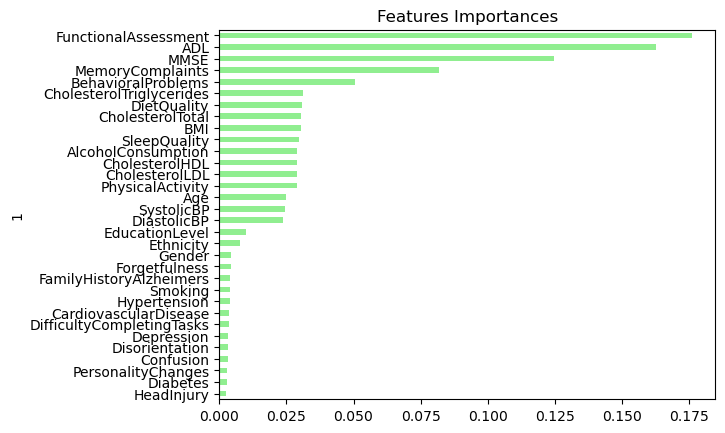

In [25]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)